<a href="https://colab.research.google.com/github/ntolayd/CE888/blob/main/Assignment/No_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive,
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Test.zip"
!unzip "/content/gdrive/My Drive/Training.zip"

In [ ]:
import os 
import random
import shutil

In [ ]:
os.mkdir('Validation')
os.mkdir('Validation/Fire')
os.mkdir('Validation/No_Fire')

In [ ]:
#Creating validation folder and moving randomly selected images from traning folder to validation folder
random.seed(126)
source = 'Training/Fire'
dest = 'Validation/Fire'
files = os.listdir(source)
no_of_files = len(files) // 6

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [ ]:
#Creating validation folder and moving randomly selected images from traning folder to validation folder
random.seed(19)
source = 'Training/No_Fire'
dest = 'Validation/No_Fire'
files = os.listdir(source)
no_of_files = len(files) // 6

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [ ]:
import numpy as np
from tqdm import tqdm
from random import shuffle
import cv2
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report
from skimage.color import rgb2hsv
import skimage

In [ ]:
Train_path = 'Training'
Test_path = 'Test'
Validation_path ='Validation'

In [ ]:
from skimage.color import rgb2hsv
def color_aug(img):
  img = img / 255
  new_img = rgb2hsv(img) * 255
  return new_img

In [ ]:
def noise(img):
    img = img / 255
    gimg = skimage.util.random_noise(img, mode='poisson') * 255
    return gimg 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size=(254, 254),
    batch_size=64,
    color_mode='rgb',
    class_mode='binary',
    shuffle=True) # set as training data

validation_generator = validation_datagen.flow_from_directory(
    Validation_path, 
    target_size=(254, 254),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary', shuffle=False) # set as validation data

test_generator = test_datagen.flow_from_directory(
        Test_path,
        target_size=(254, 254),
        color_mode='rgb',
        batch_size=1,
        class_mode='binary', shuffle=False)

Found 32814 images belonging to 2 classes.
Found 6561 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Fire': 0, 'No_Fire': 1}

**Xception**

In [ ]:
from keras.applications import Xception


xcep = Xception(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(xcep)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 353s 639ms/step - loss: 0.0662 - accuracy: 0.9788 - val_loss: 0.0107 - val_accuracy: 0.9985
Epoch 2/5
512/512 [==============================] - 324s 633ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0072 - val_accuracy: 0.9985
Epoch 3/5
512/512 [==============================] - 325s 634ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0095 - val_accuracy: 0.9988
Epoch 4/5
512/512 [==============================] - 324s 633ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.0095 - val_accuracy: 0.9992
Epoch 5/5
512/512 [==============================] - 324s 633ms/step - loss: 4.0315e-05 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9994


In [ ]:
predictions = model.predict(test_generator)


In [ ]:

test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76      5137
           1       0.69      0.32      0.44      3480

    accuracy                           0.67      8617
   macro avg       0.68      0.61      0.60      8617
weighted avg       0.67      0.67      0.63      8617



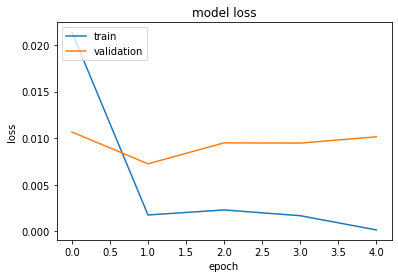

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

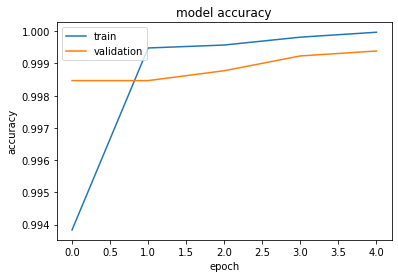

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**DenseNet**

In [ ]:
from keras.applications import DenseNet121
densenet_v2 = DenseNet121(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(densenet_v2)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 179s 308ms/step - loss: 0.0883 - accuracy: 0.9648 - val_loss: 0.0055 - val_accuracy: 0.9986
Epoch 2/5
512/512 [==============================] - 154s 301ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0053 - val_accuracy: 0.9994
Epoch 3/5
512/512 [==============================] - 154s 300ms/step - loss: 5.7329e-04 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9995
Epoch 4/5
512/512 [==============================] - 154s 301ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0069 - val_accuracy: 0.9997
Epoch 5/5
512/512 [==============================] - 154s 300ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.0060 - val_accuracy: 0.9995


In [ ]:
predictions = model.predict(test_generator)

In [ ]:
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      5137
           1       0.72      0.97      0.83      3480

    accuracy                           0.84      8617
   macro avg       0.85      0.86      0.84      8617
weighted avg       0.87      0.84      0.84      8617



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 8, 8, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 7,562,817
Trainable params: 7,479,169
Non-trainable params: 83,648
_______________________________________

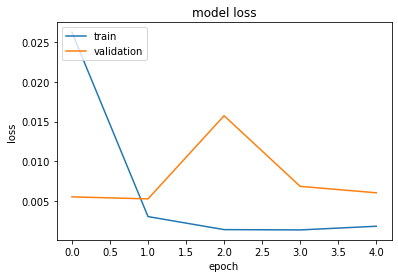

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

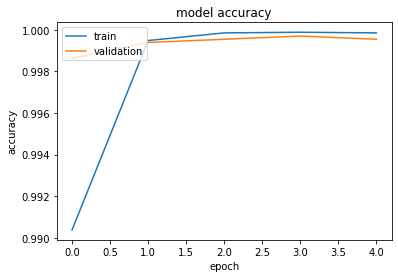

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**VGG16**

In [ ]:
from keras.applications import VGG16
vgg16 = VGG16(
    include_top=False,
    input_shape=(254,254,3),
    classifier_activation="sigmoid")
model = Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 193s 363ms/step - loss: 0.2378 - accuracy: 0.9013 - val_loss: 0.0293 - val_accuracy: 0.9940
Epoch 2/5
512/512 [==============================] - 180s 352ms/step - loss: 0.0623 - accuracy: 0.9828 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 3/5
512/512 [==============================] - 181s 353ms/step - loss: 0.0683 - accuracy: 0.9869 - val_loss: 0.0227 - val_accuracy: 0.9945
Epoch 4/5
512/512 [==============================] - 180s 352ms/step - loss: 0.3718 - accuracy: 0.9817 - val_loss: 0.0319 - val_accuracy: 0.9979
Epoch 5/5
512/512 [==============================] - 180s 352ms/step - loss: 0.2885 - accuracy: 0.9794 - val_loss: 0.0126 - val_accuracy: 0.9937


In [ ]:
predictions = model.predict(test_generator)


In [ ]:
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83      5137
           1       0.84      0.54      0.65      3480

    accuracy                           0.77      8617
   macro avg       0.79      0.73      0.74      8617
weighted avg       0.78      0.77      0.76      8617



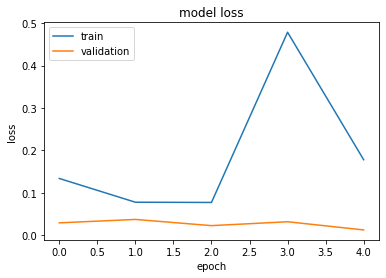

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

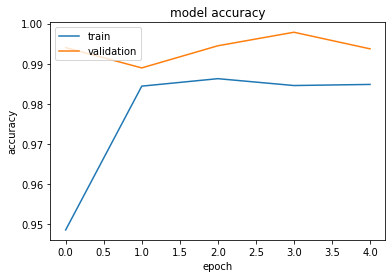

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**ResNet**

In [ ]:
from keras.applications import ResNet101

resnet = ResNet101(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

171450368/171446536 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 267s 476ms/step - loss: 0.0578 - accuracy: 0.9798 - val_loss: 48.9059 - val_accuracy: 0.3614
Epoch 2/5
512/512 [==============================] - 241s 471ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 3.7633 - val_accuracy: 0.5968
Epoch 3/5
512/512 [==============================] - 241s 471ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 4/5
512/512 [==============================] - 241s 471ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0258 - val_accuracy: 0.9986
Epoch 5/5
512/512 [==============================] - 241s 470ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 0.0034 - val_accuracy: 0.9992


In [ ]:
predictions = model.predict(test_generator)


In [ ]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

# get the classification report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      5137
           1       0.76      0.91      0.83      3480

    accuracy                           0.85      8617
   macro avg       0.84      0.86      0.85      8617
weighted avg       0.86      0.85      0.85      8617



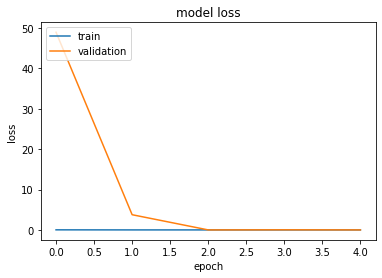

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

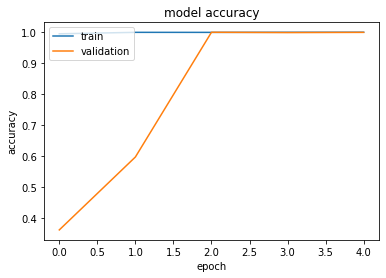

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
